In [1]:
import os
import numpy as np


def find_best(task_search, checkpoint):
    log_files_a = os.listdir(checkpoint+"/")
    log_files_b = []


    
    for file in log_files_a:
        file_split = file.split(".")
        if(file_split[-1]=="txt"):
            file_split_2 = file_split[0].split("_")
            if(file_split_2[0]=="session" and file_split_2[1]==str(task_search)  and int(file_split_2[2])>=0 and int(file_split_2[2])<8):
                log_files_b.append(file)

    best_acc = []
    best_acc_b = []
    for file in log_files_b: 
        f = np.loadtxt(checkpoint+"/"+file, skiprows=1)
        best_acc.append(max(f[-1,-1], f[-1,-2]))
        best_acc_b.append(int(file.split("_")[2]))

    bets_acc = np.array(best_acc)
    bets_acc_b = np.array(best_acc_b)
    
    a = np.argmax(best_acc)
#     return task_search, best_acc_b[a], best_acc[a]
    return best_acc[a], a


In [196]:
77.15 - 53.54

23.610000000000007

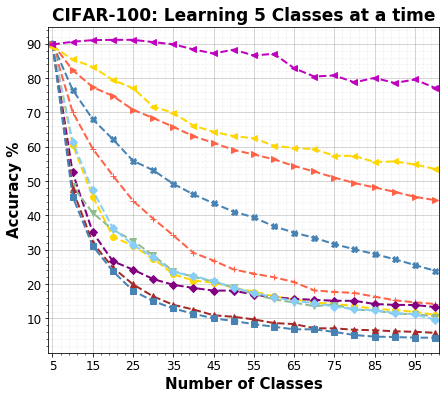

In [276]:
# CIFAR100_10

import matplotlib.pyplot as plt
nc = 5
results = {
                "DMC" : [[90.05,76.58,68.01,62.20,55.93,53.18,49.21,46.15,43.56,41.11,39.44,36.84,35.01,33.49,31.66,30.14,28.77,27.24,25.57,23.89] , "steelblue", "X--"],
#                 "Oracle" : [[90.05,84.39,84.70,83.03,80.28,78.45,78.30,77.70,77.09,76.34,75.27,74.36,73.76,72.85,72.55,71.79,71.19,70.73,70.70,70.29], "purple", "o"],
                "LwF" : [[90.05,70.15,59.43,51.63,44.29,39.09,34.20,29.15,26.86,24.27,23.05,21.99,20.62,18.17,17.72,17.43,16.36,15.30,14.69,14.24], "tomato", "+--"],
                "RWalk" : [[90.05,60.65,45.50,33.87,31.12,27.45,22.87,21.04,20.43,18.91,17.84,16.47,15.56,14.65,14.20,13.60,12.84,12.39,11.94,11.03], "gold", "o--"],
                "SI" : [[90.05,52.53,35.08,26.67,24.23,21.48,19.80,18.89,18.13,18.11,16.93,16.17,15.72,15.42,15.17,15.13,14.22,13.95,13.93,13.32], "purple", "D--"],
                "MAS" : [[90.05,48.55,40.75,35.86,32.65,28.37,23.79,22.11,20.74,19.06,17.08,15.56,14.64,13.58,14.05,12.52,12.38,11.32,11.30,10.57], "darkseagreen", "v--"],
                "EWC" : [[90.05,61.42,47.34,36.32,31.43,27.91,23.48,22.41,20.89,18.91,17.54,16.17,15.10,14.50,13.44,12.68,12.38,11.62,11.17,9.65], "lightskyblue", "D--"],
                "Finetuning" : [[90.05,47.63,32.02,24.83,19.94,16.43,13.98,12.61,10.94,10.49,9.73,8.66,8.37,7.15,7.12,6.71,6.57,6.26,6.12,5.82], "brown", "^--"],
                "FixedRep" : [[90.05,45.49,31.10,23.76,18.10,15.05,12.91,11.39,10.02,9.26,8.35,7.59,6.83,6.84,6.08,5.17,4.72,4.58,4.43,4.39], "steelblue", "s--"],
                "iCaRL" : [[90.05,82.34,77.37,74.80,70.79,68.38,65.81,63.08,61.16,59.07,57.78,56.34,54.41,52.81,51.04,49.44,48.15,46.87,45.43,44.46], "tomato", ">--"],
                "RPS" : [[89.2,85.5,83.266666,79.45,77.08,71.7,69.914286,66.15,64.377778,63.12,62.472727,60.316667,59.646154,59.314286,57.4,57.325,55.576471,55.744444,54.852632,53.54], "gold", "<--"],
#                 "Ours" : [[88,91,92,89,90,90,89,89,88,87,87,86,85,85,84,83,83,82,82,81], "m", "<--"]
                "Ours" : [[ 89.8,90.6,91.0667,91.15,91.16,90.5,89.8571,88.375,87.1778,88.3,86.6,87.1,82.8923,80.4714,80.7867,78.775,80.0941,78.5778,79.6105,77.15], "m", "<--"],
          }


plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
for l in list(results.keys()):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,95])
plt.xlim([4,101])
# plt.legend(loc='upper right',  ncol=4, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-100: Learning 5 Classes at a time", fontweight='bold', fontsize=17)
plt.xticks(range(nc,103,10),fontsize=12)
plt.yticks(range(10,95,10),fontsize=12)
plt.savefig("plot_data/CIFAR100_20.pdf", bbox_inches='tight')



In [8]:
import matplotlib
matplotlib.get_configdir()

'/home/ubuntu/.config/matplotlib'

In [425]:
(77.79 - 56.48)

21.31000000000001

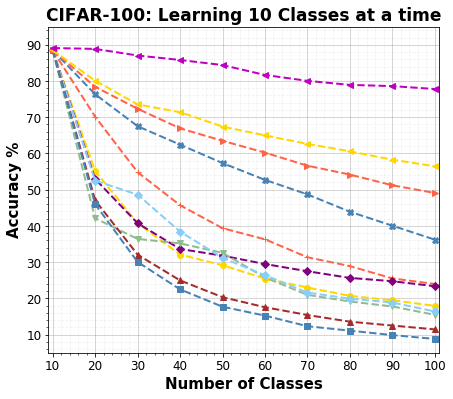

In [265]:
# CIFAR100_10
nc = 10
results = {
                "DMC" : [[88.5, 76.33292656, 67.52672256, 62.4353122, 57.34446679, 52.71745271, 48.709822, 43.9283858, 40.07555385, 36.22253358] , "steelblue", "X--"],
#                 "Oracle" : [[88.5, 82.83485119, 78.98183092, 77.60559083, 76.38452615, 74.69887686, 72.85899377, 71.79178625, 71.03511785, 70.58785865], "purple", "o"],
                "LwF" : [[88.5, 70.1409761, 54.83322411, 45.71723426, 39.38762213, 36.30878398, 31.3723607, 28.91309424, 25.52428194, 23.99343141], "tomato", "+--"],
                "RWalk" : [[88.5, 55.12511958, 40.7465368, 32.09531988, 29.17090386, 25.47287067, 23.01341589, 20.70819492, 19.48731855, 17.95646803], "gold", "o--"],
                "SI" : [[88.5, 52.95812524, 40.7465368, 33.64255422, 31.80323609, 29.49782679, 27.5027683, 25.66194361, 24.75028813, 23.37442468], "purple", "D--"],
                "MAS" : [[88.5, 42.12221193, 36.4123598, 35.19054183, 32.57647661, 25.78227987, 21.00122031, 19.16039562, 17.78453218, 15.4793112], "darkseagreen", "v--"],
                "EWC" : [[88.5, 52.49372896, 48.64127364, 38.44188079, 31.18309944, 26.40166324, 21.62041536, 19.93438943, 18.86793519, 16.40848041], "lightskyblue", "D--"],
                "Finetuning" : [[88.5, 47.07614894, 32.07780615, 24.97401189, 20.34737445, 17.57813383, 15.42789993, 13.58745188, 12.52099764, 11.45473172], "brown", "^--"],
                "FixedRep" : [[88.5, 45.99218097, 30.06561057, 22.49760834, 17.7157955, 15.2561524, 12.33267798, 11.11142498, 9.889607015, 8.823152772], "steelblue", "s--"],
                "iCaRL" : [[88.5, 78.39607201, 72.34042553, 66.93944354, 63.50245499, 60.22913257, 56.62847791, 54.17348609, 51.22749591, 49.09983633], "tomato", ">--"],
                "RPS" : [[88.5, 80.1, 73.533333, 71.4, 67.42, 65, 62.642857, 60.6, 58.277778, 56.48], "gold", "<--"],
#                 "Ours" : [[89.5,89.3,88.16666666666666,86.625,84.6,82.58333333333334,81.08571428571429,79.2,77.74444444444445,76.86], "m", "<--"],
                "Ours" : [[89.1,88.85,87.03333333333333,85.8,84.39999999999999,81.66666666666667,80.04285714285714,78.925,78.58888888888889,77.79], "m", "<--"],    
          }


# plt.style.use('gadly')

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
# plt.rcParams['axes.labelsize'] = 10
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titlesize'] = 10
# plt.rcParams['xtick.labelsize'] = 8
# plt.rcParams['ytick.labelsize'] = 8
# plt.rcParams['legend.fontsize'] = 10
# plt.rcParams['figure.titlesize'] = 12

plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
for l in list(results.keys()):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([5,95])
plt.xlim([9,101])
# plt.legend(loc='upper right',  ncol=12, handleheight=1.0, labelspacing=0.05, fontsize='large', bbox_to_anchor=(1, -0.2))
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-100: Learning 10 Classes at a time", fontweight='bold', fontsize=17)
plt.xticks(range(nc,101,10),fontsize=12)
plt.yticks(range(10,100,10),fontsize=12)
plt.savefig("plot_data/CIFAR100_10.pdf", bbox_inches='tight')



In [197]:
72.33 -  54.16

18.17

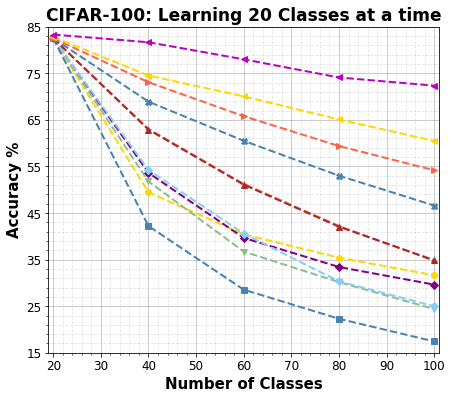

In [264]:
# CIFAR100_5
nc = 20
results = {
                "DMC" : [[82.5, 68.90401649, 60.4940543, 53.00889508, 46.60398683] , "steelblue", "X--"],
#                 "Oracle" : [[82.5, 77.8680228, 74.6509274, 72.20921318, 70.07738704], "purple", "o"],
                "LwF" : [[82.5, 63.03979694, 51.23400932, 42.20600991, 34.72122616], "tomato", "+--"],
                "RWalk" : [[82.5, 49.46024999, 40.43112414, 35.41661191, 31.6351703], "gold", "o--"],
                "SI" : [[82.5, 53.62543039, 39.66026727, 33.41005606, 29.62823897], "purple", "D--"],
                "MAS" : [[82.5, 51.77469802, 36.72853297, 30.16930315, 24.38205664], "darkseagreen", "v--"],
                "EWC" : [[82.5, 54.2438431, 40.58582119, 30.3240002, 24.99896743], "lightskyblue", "D--"], 
                "Finetuning" : [[82.5, 62.88622633, 51.07968775, 42.05168834, 34.87554773], "brown", "^--"],
                "FixedRep" : [[82.5, 42.20600991, 28.54986539, 22.29852775, 17.43683517], "steelblue", "s--"],
                "iCaRL" : [[82.5, 73.06547619, 65.77380952, 59.375, 54.16666667], "tomato", ">--"],
                "RPS" : [[82.8, 74.5, 70.03, 65.08, 60.47], "gold", "<--"],
                "Ours" : [[83.3,81.65,77.98333333333333,74.08749999999999,72.33000000000001], "m", "<--"],
          }



plt.figure(figsize=(7,6))
x = range(20,120,20)
for l in list(results.keys()):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(3)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.5)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.minorticks_on()

plt.ylim([15,85])
plt.xlim([19,101])
# plt.legend(loc='upper right',  ncol=3, handleheight=1.5, labelspacing=0.05, fontsize='medium')
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-100: Learning 20 Classes at a time", fontweight='bold', fontsize=17)
plt.xticks(range(nc,101,10),fontsize=12)
plt.yticks(range(15,90,10),fontsize=12)
plt.savefig("plot_data/CIFAR100_5.pdf", bbox_inches='tight')



In [198]:
69.51-67.01

2.5

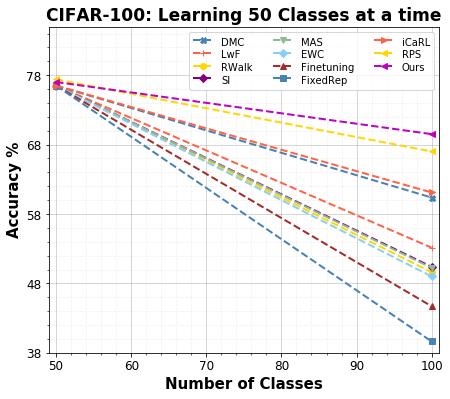

In [266]:
# CIFAR100_2
nc = 50
results = {
                "DMC" : [[76.5, 60.36855462] , "steelblue", "X--"],
#                 "Oracle" : [[76.5, 70.19965703], "purple", "o"],
                "LwF" : [[76.5, 53.1486526], "tomato", "+--"],
                "RWalk" : [[76.5, 49.61560017], "gold", "o--"],
                "SI" : [[76.5, 50.38365505], "purple", "D--"],
                "MAS" : [[76.5, 50.23004407], "darkseagreen", "v--"],
                "EWC" : [[76.5, 49.00152866], "lightskyblue", "D--"], 
                "Finetuning" : [[76.5, 44.70042136], "brown", "^--"],
                "FixedRep" : [[76.5, 39.63125918], "steelblue", "s--"],
                "iCaRL" : [[76.5, 61.1], "tomato", ">--"],
                "RPS" : [[77.4, 67.01], "gold", "<--"],
                "Ours" : [[77.02,69.51], "m", "<--"],
#                 "Ours" : [[77.68,68.55], "m", "<--"],
          }

plt.figure(figsize=(7,6))
x = range(nc,100+nc,nc)
for l in list(results.keys()):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([38,85])
plt.xlim([nc-1,101])
plt.legend(loc='upper right',  ncol=3, handleheight=1.5, labelspacing=0.05, fontsize='medium')
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-100: Learning 50 Classes at a time", fontweight='bold', fontsize=17)
plt.xticks(range(nc,110,10),fontsize=12)
plt.yticks(range(38,85,10),fontsize=12)
plt.savefig("plot_data/CIFAR100_2.pdf", bbox_inches='tight')



In [213]:
89.82-74.12

15.699999999999989

& LwF & 99.3&95.2&85.9&73.9&63.7&54.8&50.1&44.5&40.7&36.7 \\
& Finetuning & 99.3&49.4&32.6&24.7&20.0&16.7&13.9&12.3&11.1&9.9 \\
& FixedRep & 99.3&88.1&73.7&62.6&55.7&50.2&42.9&41.3&39.2&35.3 \\
& iCaRL & 99.3&97.2&93.5&91.0&87.5&82.1&77.1&72.8&67.1&63.5 \\
& RPS & 100.0&97.4&94.3&92.7&89.4&86.6&83.9&82.4&79.4&74.1 \\
& Ours-task & 100.0&100.0&100.0&100.0&100.0&100.0&100.0&100.0&100.0&99.0 \\
& Ours & 99.4&96.4&94.4&93.0&92.4&90.6&89.9&90.3&90.3&89.8 \\


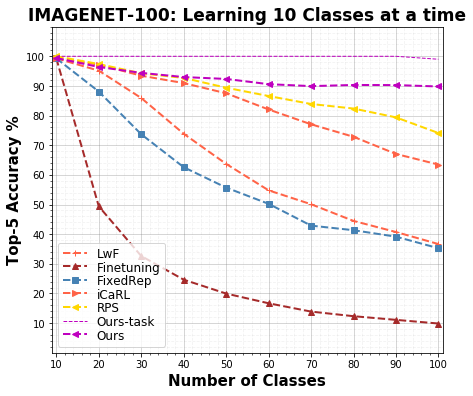

In [246]:
# CIFAR100_10
nc = 10
results = {
#                 "Oracle" : [[88.5, 82.83485119, 78.98183092, 77.60559083, 76.38452615, 74.69887686, 72.85899377, 71.79178625, 71.03511785, 70.58785865], "purple", "o"],
                "LwF" : [[99.3,95.15918358,85.92884537,73.87734781,63.70656005,54.78970503,50.10449439,44.47940211,40.73520893,36.67696466], "tomato", "+--"],
                "Finetuning" : [[99.3,49.39082797,32.63632543,24.66048787,19.97565583,16.70130883,13.8973759,12.34756502,11.11085871,9.874531006], "brown", "^--"], 
                "FixedRep" : [[99.3,88.10581193,73.70300119,62.59195317,55.71254955,50.24382025,42.89457046,41.34457027,39.16779301,35.26629034], "steelblue", "s--"],
                "iCaRL" : [[99.3,97.19682428,93.4526311,90.96237066,87.53109276,82.06274207,77.06404825,72.8500089,67.06760712,63.47977693], "tomato", ">--"],
                "RPS" : [[100,97.4,94.266667,92.7,89.4,86.6,83.914286,82.375,79.4,74.12], "gold", "<--"],
                "Ours-task" : [[100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0], "m", "--"],
                "Ours" : [[99.4,96.39999999999999,94.39999999999999,93.0,92.36,90.60000000000001,89.94285714285715,90.325,90.28888888888889,89.82], "m", "<--"],
          }




plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
for l in list(results.keys()):
    if("task" in l):
        plt.plot(x, results[l][0], results[l][2], linewidth=1, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,110])
plt.xlim([9,101])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Top-5 Accuracy %", fontweight='bold', fontsize=15)
plt.title("IMAGENET-100: Learning 10 Classes at a time", fontweight='bold', fontsize=17)
plt.xticks(range(nc,101,10))
plt.yticks(range(10,110,10))
plt.savefig("plot_data/IMAGENET_100_10.pdf", bbox_inches='tight')

for l in list(results.keys()):
    print("&", l, "&",  "&".join(['{:1.1f}'.format(float(np.around(x,2))) for x in results[l][0]]) ,"\\\\")

In [195]:
63.22 - 44.1307578

19.0892422

& LwF & 90.2&77.6&63.6&51.6&42.8&35.5&31.5&28.4&26.1&24.2 \\
& Finetuning & 90.2&43.1&27.9&18.9&15.6&14.0&11.7&10.0&8.9&8.2 \\
& FixedRep & 90.1&76.1&66.9&58.8&52.9&48.9&46.1&43.1&41.2&38.5 \\
& iCaRL & 90.1&82.8&76.1&69.8&63.3&57.2&53.5&49.8&46.7&44.1 \\
& Ours-task & 100.0&100.0&100.0&100.0&100.0&100.0&95.1&99.8&98.7&92.8 \\
& Ours & 91.5&89.0&85.7&84.0&80.1&76.7&70.2&71.0&67.9&63.2 \\


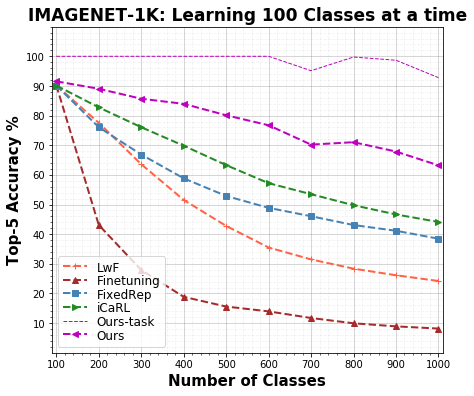

In [245]:
# CIFAR100_10
nc = 100
results = {
#                 "Oracle" : [[88.5, 82.83485119, 78.98183092, 77.60559083, 76.38452615, 74.69887686, 72.85899377, 71.79178625, 71.03511785, 70.58785865], "purple", "o"],
                "LwF" : [[90.19316493,77.56315007,63.59583952,51.56017831,42.79346211,35.51263001,31.50074294,28.38038633,26.15156018,24.21991085], "tomato", "+--"],
                "Finetuning" : [[90.19316493,43.09063893,27.9346211,18.87072808,15.60178306,13.96731055,11.7384844,9.955423477,8.915304606,8.172362556], "brown", "^--"], 
                "FixedRep" : [[90.14457652,76.07726597,66.86478455,58.8410104,52.897474,48.88558692,46.06240713,43.09063893,41.1589896,38.48439822], "steelblue", "s--"],
                "iCaRL" : [[90.14175334,82.76374443,76.07726597,69.83655275,63.2986627,57.20653789,53.49182764,49.77711738,46.65676077,44.1307578], "forestgreen", ">--"],
#                 "RPS" : [[100,97.4,94.266667,92.7,89.4,86.6,83.914286,82.375,79.4,74.12], "gold", "<--"],
#                 "Ours-task" : [[100.0,100.0,100.0,100.0,100.0,100.0,99.71428571428571,99.0,96.66666666666667,92.0], "m", "--"],  #p=100
#                 "Ours" : [[86.82,84.31,82.39999999999999,79.605,74.476,70.47,66.82571428571428,63.1225,59.077777777777776,54.65], "m", "<--"],
    
#                 "Ours-task" : [[100.0,100.0,100.0,100.0,100.0,99.16666666666667,95.71428571428572,94.875,88.88888888888889,85.5], "m", "--"],  #p=50
#                 "Ours" : [[86.82,84.31,82.39999999999999,79.605,74.476,69.95666666666666,64.40571428571428,60.57749999999999,54.848888888888894,51.12799999999999], "m", "<--"],
    
                "Ours-task" : [[100.0,100.0,100.0,100.0,100.0,100.0,95.14285714285714,99.75,98.66666666666667,92.80000000000001], "m", "--"],  #p=100,224
                "Ours" : [[91.53999999999999,89.05,85.68666666666667,83.965,80.12,76.73333333333333,70.21428571428572,71.0275,67.87333333333333,63.22], "m", "<--"],
          }

# 100.0,100.0,100.0,100.0,99.4,99.66666666666667,93.71428571428572,97.0,96.11111111111111,86.5
# 91.53999999999999,89.05,85.68666666666667,83.965,79.67999999999999,76.50333333333333,69.36857142857143,69.28750000000001,66.25111111111111,59.394000000000005


plt.figure(figsize=(7,6))
x = range(nc,nc+1000,nc)
for l in list(results.keys()):
    if("task" in l):
        plt.plot(x, results[l][0], results[l][2], linewidth=1, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,110])
plt.xlim([90,1010])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Top-5 Accuracy %", fontweight='bold', fontsize=15)
plt.title("IMAGENET-1K: Learning 100 Classes at a time", fontweight='bold', fontsize=17)
plt.xticks(range(nc,1010,100))
plt.yticks(range(10,110,10))
plt.savefig("plot_data/IMAGENET_1000_10.pdf", bbox_inches='tight')

for l in list(results.keys()):
    print("&", l, "&",  "&".join(['{:1.1f}'.format(float(np.around(x,2))) for x in results[l][0]]) ,"\\\\")

In [426]:
95.018 - 87.63636363636364

7.38163636363636

& BiC & 95.7&96.5&96.5&95.7&95.1&94.2&93.2&91.7&90.0&87.6 \\
& iCaRL & 94.2&93.7&90.8&86.5&80.8&77.2&74.9&71.1&68.5&65.5 \\
& RPSnet & 92.8&92.0&92.3&90.8&86.3&83.6&80.0&76.4&71.8&65.0 \\
& Ours-task & 100.0&100.0&100.0&100.0&100.0&100.0&100.0&100.0&100.0&100.0 \\
& Ours & 94.0&95.6&96.0&95.8&95.5&95.4&95.2&95.1&95.0&95.0 \\


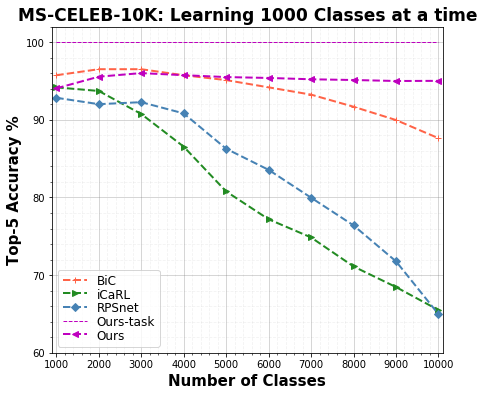

In [244]:
# CIFAR100_10
nc = 1000
results = {
#                 "Oracle" : [[88.5, 82.83485119, 78.98183092, 77.60559083, 76.38452615, 74.69887686, 72.85899377, 71.79178625, 71.03511785, 70.58785865], "purple", "o"],
                "BiC" : [[95.74025974025975, 96.51948051948054, 96.51948051948054, 95.74025974025975, 95.11688311688313, 94.18181818181819, 93.24675324675326, 91.6883116883117, 89.97402597402598, 87.63636363636364], "tomato", "+--"],
#                 "Finetuning" : [[90.19316493,43.09063893,27.9346211,18.87072808,15.60178306,13.96731055,11.7384844,9.955423477,8.915304606,8.172362556], "brown", "^--"], 
#                 "FixedRep" : [[90.14457652,76.07726597,66.86478455,58.8410104,52.897474,48.88558692,46.06240713,43.09063893,41.1589896,38.48439822], "steelblue", "s--"],
                "iCaRL" : [[94.18181818181819, 93.71428571428572, 90.75324675324677, 86.54545454545456, 80.7792207792208, 77.1948051948052, 74.85714285714286, 71.11688311688312, 68.46753246753246, 65.50649350649351], "forestgreen", ">--"],
                "RPSnet" : [[92.84,92.016667,92.273333,90.828333,86.278667,83.56,79.97619,76.406667,71.782222,64.98], "steelblue", "D--"],

                "Ours-task" : [[100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0], "m", "--"],  #p=100,224
                "Ours" : [[94.05333333333333,95.55666666666667,96.01555555555555,95.75166666666667,95.504,95.39333333333333,95.22190476190477,95.12833333333333,95.00148148148149,95.018], "m", "<--"],
          }




plt.figure(figsize=(7,6))
x = range(nc,nc+10000,nc)
for l in list(results.keys()):
    if("task" in l):
        plt.plot(x, results[l][0], results[l][2], linewidth=1, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([60,102])
plt.xlim([900,10100])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Top-5 Accuracy %", fontweight='bold', fontsize=15)
plt.title("MS-CELEB-10K: Learning 1000 Classes at a time", fontweight='bold', fontsize=17)
plt.xticks(range(nc,10100,1000))
plt.yticks(range(60,102,10))
plt.savefig("plot_data/MS1M_10000_10.pdf", bbox_inches='tight')

for l in list(results.keys()):
    print("&", l, "&",  "&".join(['{:1.1f}'.format(float(np.around(x,2))) for x in results[l][0]]) ,"\\\\")

In [103]:
'{:1.2f}'.format(0.56)

'0.56'

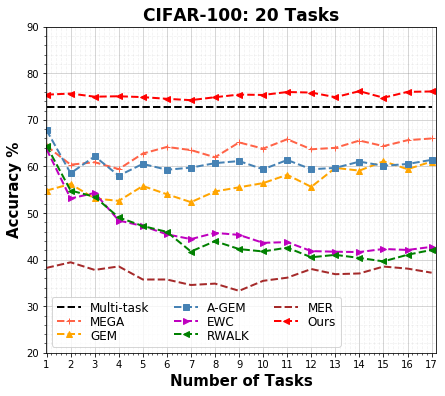

In [43]:
# CIFAR100_10
nc = 17
results = {
                "Multi-task" : [[0.728]*17, "black", "--"],
                "MEGA" : [[0.6437,0.6038,0.609,0.5942,0.6276,0.6418,0.6351,0.6196,0.6515,0.6382,0.6583,0.6368,0.6399,0.6555,0.6436,0.6563,0.66], "tomato", "+--"],
                "GEM" : [[0.5482,0.5623,0.5312,0.5261,0.558,0.5403,0.5233,0.5463,0.5552,0.5642,0.582,0.5561,0.5969,0.591,0.6111,0.5941,0.6104], "orange", "^--"], 
                "A-GEM" : [[0.6778,0.5853,0.6216,0.5802,0.6054,0.5929,0.5974,0.607,0.6115,0.5938,0.6138,0.5939,0.5969,0.6103,0.6014,0.6052,0.6141], "steelblue", "s--"],
                "EWC" : [[0.6371,0.5312,0.5431,0.4839,0.4721,0.4543,0.444,0.4574,0.453,0.436,0.4375,0.4183,0.4169,0.4162,0.4229,0.4207,0.4274], "m", ">--"],
                "RWALK" : [[0.6445,0.5482,0.5349,0.4905,0.4721,0.4595,0.4174,0.4396,0.4226,0.4175,0.4257,0.405,0.4102,0.4036,0.3962,0.4104,0.4208], "green", "<--"],
                "MER" : [[0.3823,0.3942,0.3779,0.3854,0.3573,0.3573,0.3455,0.3485,0.333,0.3545,0.3612,0.3798,0.3687,0.3703,0.3851,0.3807,0.3719], "brown", "--"],
                "Ours" : [[0.754,0.7564,0.7496666666666668,0.7505714285714284,0.74875,0.7451111111111112,0.7422,0.7485454545454546,0.7541666666666665,0.7533846153846154,0.7597142857142858,0.7585333333333333,0.748625,0.7615294117647058,0.7474444444444446,0.76,0.7609], "red", "<--"],
#    0.892,0.7669999999999999,0.752,0.754,0.7564,0.7496666666666668,0.7505714285714284,0.74875,0.7451111111111112,0.7422,0.7485454545454546,0.7541666666666665,0.7533846153846154,0.7597142857142858,0.7585333333333333,0.748625,0.7615294117647058,0.7474444444444446,0.76,0.7609
          }




plt.figure(figsize=(7,6))
x = range(1,18)
for l in list(results.keys()):
    plt.plot(x, [i*100 for i in results[l][0]], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([20,90])
plt.xlim([0.97,17.2])
plt.legend(loc='lower left',  ncol=3, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CIFAR-100: 20 Tasks", fontweight='bold', fontsize=17)
plt.xticks(range(1,18))
# plt.yticks(range(10,110,10))
plt.savefig("plot_data/SPLIT_CIFAR_TASK_AWARE.pdf", bbox_inches='tight')




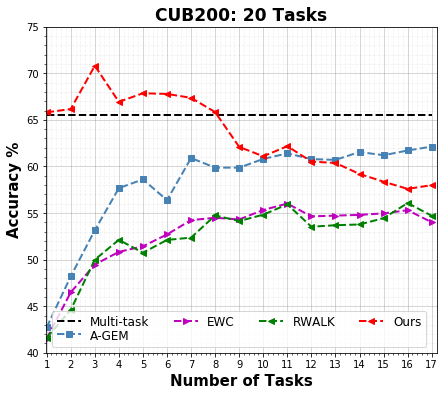

In [133]:
# CUB200
nc = 17
results = {
                "Multi-task" : [[0.6555]*17, "black", "--"],
#                 "MEGA" : [[0.4034,0.5956,0.6776,0.7195,0.745,0.7228,0.7569,0.768,0.7696,0.7644,0.7909,0.7814,0.7779,0.7805,0.777,0.7966,0.8034], "tomato", "+--"],
#                 "GEM" : [[0.5482,0.5623,0.5312,0.5261,0.558,0.5403,0.5233,0.5463,0.5552,0.5642,0.582,0.5561,0.5969,0.591,0.6111,0.5941,0.6104], "orange", "^--"], 
                "A-GEM" : [[0.4273,0.482,0.5315,0.5767,0.5861,0.5638,0.609,0.5987,0.5987,0.608,0.614,0.6079,0.607,0.6155,0.612,0.6171,0.6213], "steelblue", "s--"],
                "EWC" : [[0.4153,0.4649,0.4947,0.5083,0.5143,0.527,0.5424,0.5449,0.5431,0.5533,0.5601,0.5464,0.5472,0.548,0.5496,0.553,0.5401], "m", ">--"],
                "RWALK" : [[0.4162,0.4461,0.4999,0.5212,0.5074,0.5211,0.5236,0.5474,0.5414,0.5482,0.5593,0.5353,0.5369,0.5377,0.5445,0.5607,0.547], "green", "<--"],
#                 "MER" : [[0.3823,0.3942,0.3779,0.3854,0.3573,0.3573,0.3455,0.3485,0.333,0.3545,0.3612,0.3798,0.3687,0.3703,0.3851,0.3807,0.3719], "brown", "--"],
                "Ours" : [[0.658,0.6616,0.708,0.6693,0.6785,0.6778,0.6736,0.6583,0.6209,0.6109,0.6217,0.6052,0.6037,0.5919,0.5836,0.5759,0.5799], "red", "<--"],
#    0.892,0.7669999999999999,0.752,0.754,0.7564,0.7496666666666668,0.7505714285714284,0.74875,0.7451111111111112,0.7422,0.7485454545454546,0.7541666666666665,0.7533846153846154,0.7597142857142858,0.7585333333333333,0.748625,0.7615294117647058,0.7474444444444446,0.76,0.7609
          }




plt.figure(figsize=(7,6))
x = range(1,18)
for l in list(results.keys()):
    plt.plot(x, [i*100 for i in results[l][0]], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([40,75])
plt.xlim([0.97,17.2])
plt.legend(loc='lower left',  ncol=4, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("CUB200: 20 Tasks", fontweight='bold', fontsize=17)
plt.xticks(range(1,18))
# plt.yticks(range(10,110,10))
plt.savefig("plot_data/SPLIT_CUB200_TASK_AWARE.pdf", bbox_inches='tight')



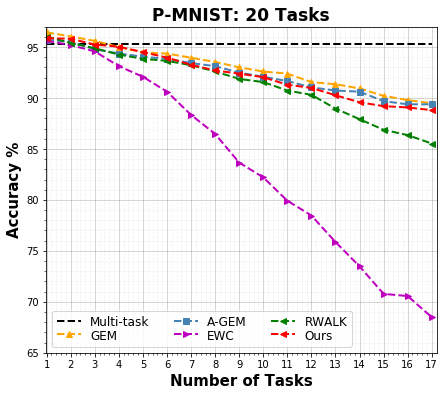

In [45]:
# PMNIST
nc = 17
results = {
                "Multi-task" : [[0.9530]*17, "black", "--"],
#                 "MEGA" : [[0.9561,	0.9530,	0.9468,	0.9374,	0.9364,	0.9332,	0.9312,	0.9312,	0.9281,	0.9249,	0.9260,	0.9229,	0.9208,	0.9187,	0.9145,	0.9125,	0.9104], "tomato", "+--"],
                "GEM" : [[0.9644, 0.9603, 0.9561, 0.9499,	0.9447,	0.9436,	0.9395,	0.9353,	0.9301,	0.9260,	0.9239,	0.9156,	0.9135,	0.9094,	0.9021,	0.8979,	0.8948], "orange", "^--"], 
                "A-GEM" : [[0.9571,0.9551,0.9478,0.9436,0.9405,0.9384,0.9343,0.9312,0.9249,0.9208,0.9166,0.9104,0.9073,0.9062,0.8969,0.8938,0.8938], "steelblue", "s--"],
                "EWC" : [[0.9561,0.9519,0.9457,0.9312,0.9208,0.9062,0.8834,0.8647,0.8366,0.8221,0.7992,0.7847,0.7587,0.7348,0.7078,0.7057,0.6849], "m", ">--"],
                "RWALK" : [[0.9603,0.954,0.9488,0.9426,0.9384,0.9364,0.9322,0.926,0.9187,0.9156,0.9073,0.9031,0.8896,0.8792,0.8688,0.8636,0.8553], "green", "<--"],
#                 "MER" : [[0.3823,0.3942,0.3779,0.3854,0.3573,0.3573,0.3455,0.3485,0.333,0.3545,0.3612,0.3798,0.3687,0.3703,0.3851,0.3807,0.3719], "brown", "--"],
                "Ours" : [[0.9587,0.9581,0.9524,0.9503,0.945,0.9396,0.9326,0.927,0.9239,0.9204,0.913,0.9099,0.9027,0.8958,0.892,0.8907,0.8881], "red", "<--"],
# 0.9764,0.9656,0.9602,0.9553,0.947,0.9439,0.9366,0.9308,0.9218,0.9199,0.9138,0.912,0.9047,0.8996,0.8988,0.8956,0.8916,0.8869,0.8831,0.8826

          }




plt.figure(figsize=(7,6))
x = range(1,18)
for l in list(results.keys()):
    plt.plot(x, [i*100 for i in results[l][0]], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([65,97])
plt.xlim([0.97,17.2])
plt.legend(loc='lower left',  ncol=3, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("P-MNIST: 20 Tasks", fontweight='bold', fontsize=17)
plt.xticks(range(1,18))
# plt.yticks(range(10,110,10))
plt.savefig("plot_data/PERMUTE_MNIST_TASK_AWARE.pdf", bbox_inches='tight')




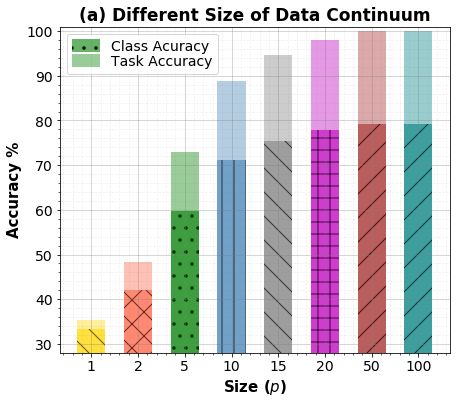

In [409]:
# CIFAR100_10
nc = 10
# results = {
#                 "50" : [[89.60000000000001,87.2,86.76666666666667,85.475,84.56,82.43333333333334,80.97142857142858,79.375,78.42222222222223,78.21000000000001], "brown", "o--", "/"],
#                 "20" : [[89.60000000000001,87.2,86.76666666666667,84.7,84.28,80.85,80.32857142857142,78.9,76.13333333333333,76.63], "m", "<--", "+"],
#                 "10" : [[89.60000000000001,87.2,86.56666666666666,83.675,81.92,76.83333333333333,75.41428571428571,73.4375,71.06666666666666,68.47], "steelblue", "D--", "\\"],
#                 "5" : [[89.60000000000001,86.2,85.46666666666667,78.675,75.76,68.89999999999999,66.2,61.475,58.91111111111111,56.769999999999996], "g", ">--", "."],
#                 "2" : [[89.60000000000001,81.2,76.3,67.9,62.28,54.81666666666667,51.214285714285715,45.9375,43.34444444444445,40.29], "tomato", "^--", "x"],
#                 "1" : [[89.60000000000001,75.0,66.86666666666666,59.0,52.86,46.28333333333333,42.25714285714286,37.5625,34.41111111111111,31.569999999999997], "orange", "s--", "\\"],   
#           }

# plt.figure(figsize=(7,6))
# x = range(nc,nc+100,nc)
# for l in list(results.keys()):
#     if(l=="Oracle"):
#         y = results[l][0]
#         y[1:-1] = [-1 for x in range(100//nc-2)]
#         plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
#     else:
#         plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
# plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
# plt.minorticks_on()

# plt.ylim([28,94])
# plt.xlim([9,101])
# plt.legend(loc='lower left',  ncol=3, handleheight=1.0, labelspacing=0.05, fontsize='large')
# plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
# plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
# plt.title("Different Size of Data Continuum", fontweight='bold', fontsize=17)
# plt.xticks(range(nc,101,10))
# plt.yticks(range(40,100,10))
# plt.savefig("plot_data/ab_chunk_size.pdf", bbox_inches='tight')



# "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*"
results = {
                "100" : [[79.2 , 100.0], "teal", "o--", "/"],
                "50" : [[79.2 , 100.0], "brown", "o--", "/"],
                "20" : [[77.79 , 98.0], "m", "<--", "+"],
                "15" : [[75.3 , 94.75], "gray", "D--", "\\"],
                "10" : [[71.12 , 88.9], "steelblue", "D--", "|"],
                "5" : [[59.64 , 72.89], "g", ">--", "."],
                "2" : [[42.03 , 48.4], "tomato", "^--", "x"],
                "1" : [[33.36 , 35.33], "gold", "s--", "\\"],   
          }


plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
# import matplotlib as mpl
# print(mpl.rcParams)
label = []
f = 0
for i,l in enumerate(list(results.keys())[::-1]):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        if(f==2):
            plt.bar([i], results[l][0][0], width=0.6, color = results[l][1], alpha=0.6, label="Class Acuracy", hatch=results[l][3])
            plt.bar([i], results[l][0][-1], width=0.6, color = results[l][1], alpha=0.4, label="Task Accuracy")
        else:
            plt.bar([i], results[l][0][0], width=0.6, color = results[l][1], alpha=0.6, hatch=results[l][3])
            plt.bar([i], results[l][0][-1], width=0.6, color = results[l][1], alpha=0.4)
        f += 1
        label.append(l)
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([28,101])
# plt.xlim([9,101])
plt.legend(loc='upper left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize=14)
plt.xlabel("Size ($p$)", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("(a) Different Size of Data Continuum", fontweight='bold', fontsize=17)
# plt.xticks(range(nc,101,10))
plt.xticks(list(range(i+1)), label, rotation=0, fontsize=14)
plt.yticks(range(30,101,10), fontsize=14)
plt.savefig("plot_data/ab_chunk_size_bar.pdf", bbox_inches='tight')



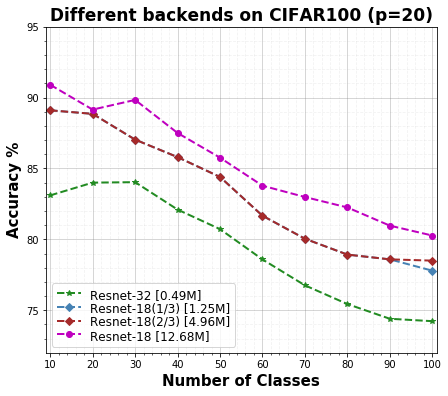

In [317]:
# CIFAR100_10
nc = 10
results = {
                "Resnet-32 [0.49M]" : [[83.1,84.0,84.03333333333333,82.1,80.72,78.58333333333334,76.75714285714285,75.4375,74.4,74.22999999999999], "forestgreen", "*--", 0.49],
                "Resnet-18(1/3) [1.25M]" : [[89.1,88.85,87.03333333333333,85.8,84.39999999999999,81.66666666666667,80.04285714285714,78.925,78.58888888888889,77.79], "steelblue", "D--", 1.25],
                "Resnet-18(2/3) [4.96M]" : [[89.1,88.85,87.03333333333333,85.8,84.39999999999999,81.66666666666667,80.04285714285714,78.925,78.58888888888889,78.5], "brown", "D--", 4.96],
                "Resnet-18 [12.68M]" : [[90.9,89.14999999999999,89.83333333333333,87.5,85.76,83.78333333333333,82.98571428571428,82.25,80.96666666666667,80.27], "m", "o--", 11.22],    
#                 "Resnet-34 [21.38M]" : [[91.2,88.85,89.26666666666667,88.2,85.8,84.53333333333333,82.74285714285713,81.35,81.4888888888889,80.2], "m", "o-"],    
          }

plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
for l in list(results.keys()):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([72,95])
plt.xlim([9,101])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("Different backends on CIFAR100 (p=20)", fontweight='bold', fontsize=17)
plt.xticks(range(nc,101,10))
# plt.yticks(range(40,100,10))
plt.savefig("plot_data/ab_backends.pdf", bbox_inches='tight')



# plt.figure(figsize=(7,6))
# x = range(nc,nc+100,nc)
# for i,l in enumerate(list(results.keys())):
#     if(l=="Oracle"):
#         y = results[l][0]
#         y[1:-1] = [-1 for x in range(100//nc-2)]
#         plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
#     else:
#         plt.scatter((results[l][3]), results[l][0][-1], linewidth=5, c = results[l][1], label=l)
    
# plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
# plt.minorticks_on()

# # plt.ylim([72,95])
# # plt.xlim([0,3])
# plt.legend(loc='lower right',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
# plt.xlabel("Number of Parameters (millions)", fontweight='bold', fontsize=15)
# plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
# plt.title("Different backends on CIFAR100 (p=20)", fontweight='bold', fontsize=17)
# # plt.xticks(range(0,12,1))
# # plt.yticks(range(40,100,10))
# plt.savefig("plot_data/ab_backends_scatter.pdf", bbox_inches='tight')





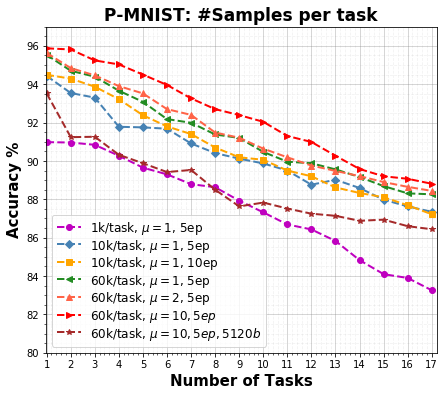

In [51]:
# CIFAR100_10
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)


nc = 17
results = {
                "1k/task, $\mu=1$, 5ep" : [[0.9098,0.9096,0.9084,0.9027,0.8965,0.893,0.8879,0.8863,0.8793,0.8732,0.8669,0.8643,0.8583,0.8483,0.841,0.839,0.8326], "m", "o--"],
                "10k/task, $\mu=1$, 5ep" : [[0.9443,0.9354,0.933,0.9178,0.9175,0.9168,0.9091,0.9041,0.9012,0.8987,0.895,0.8876,0.8902,0.8859,0.8798,0.8763,0.8735], "steelblue", "D--"],
                "10k/task, $\mu=1$, 10ep" : [[0.9449,0.9429,0.9387,0.9322,0.9238,0.918,0.914,0.907,0.9019,0.9006,0.895,0.892,0.8862,0.8833,0.8811,0.8769,0.8722], "orange", "s--"],
                "60k/task, $\mu=1$, 5ep" : [[0.9553,0.947,0.9439,0.9366,0.9308,0.9218,0.9199,0.9138,0.912,0.9047,0.8996,0.8988,0.8956,0.8916,0.8869,0.8831,0.8826], "forestgreen", "<--"],    
                "60k/task, $\mu=2$, 5ep" : [[0.9563,0.9484,0.9446,0.939,0.9352,0.927,0.924,0.9148,0.9121,0.9064,0.9019,0.8976,0.8948,0.8921,0.889,0.8865,0.8844], "tomato", "^--"],    
                "60k/task, $\mu=10, 5ep$" : [[0.9587,0.9581,0.9524,0.9503,0.945,0.9396,0.9326,0.927,0.9239,0.9204,0.913,0.9099,0.9027,0.8958,0.892,0.8907,0.8881], "red", ">--"],    
                "60k/task, $\mu=10, 5ep, 5120b$" : [[0.9352,0.9124,0.9126,0.9032,0.8988,0.8942,0.8953,0.885,0.8763,0.8783,0.8752,0.8725,0.8714,0.8688,0.8694,0.866,0.8644], "brown", "*--"],    
          }


plt.figure(figsize=(7,6))
x = range(1,18)
for l in list(results.keys()):
    plt.plot(x, [i*100 for i in results[l][0]], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([80,97])
plt.xlim([0.97,17.2])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of Tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("P-MNIST: #Samples per task", fontweight='bold', fontsize=17)
plt.xticks(range(1,18))
# plt.yticks(range(10,110,10))
plt.savefig("plot_data/ab_pmnist_samples_per_task.pdf", bbox_inches='tight')




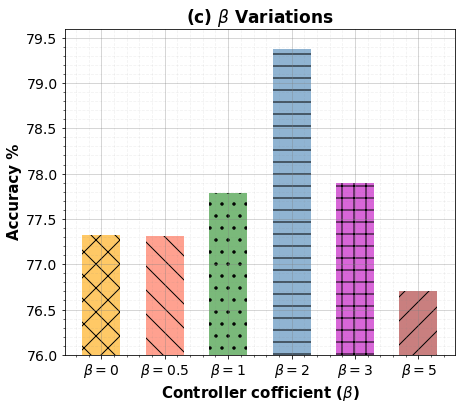

In [423]:
# CIFAR100_10
nc = 10
# results = {
#                 "$\\beta=10$" : [[88.7,84.9,84.0,83.375,81.78,78.99999999999999,77.6857142857143,75.48750000000001,72.4111111111111,71.33], "brown", "o--"],
#                 "$\\beta=5$" : [[88.0,84.30000000000001,85.43333333333334,84.425,83.89999999999999,82.36666666666667,81.2,80.625,79.89999999999999,79.74], "m", "*--"],
#                 "$\\beta=2$" : [[90.0,87.6,86.93333333333332,85.625,84.17999999999999,83.33333333333333,81.68571428571428,80.6875,80.23333333333333,80.42999999999999], "steelblue", "D--"],
#                 "$\\beta=1$" : [[88.7,87.0,86.06666666666665,85.35,83.97999999999999,82.28333333333332,80.55714285714285,79.5875,78.56666666666666,79.05], "forestgreen", ">--"],
#                 "$\\beta=0.5$" : [[89.0,86.94999999999999,86.06666666666668,85.17500000000001,83.93999999999998,81.85,80.10000000000001,78.6625,77.92222222222222,77.32], "tomato", "^--"],
#                 "$\\beta=0$" : [[88.6,86.35,87.26666666666665,84.975,83.6,81.83333333333331,79.64285714285715,77.9125,77.35555555555555,76.27], "orange", "s--"],
#           }


results = {
#                 "$\\beta=10$" : [[88.7,84.9,84.0,83.375,81.78,78.99999999999999,77.6857142857143,75.48750000000001,72.4111111111111,71.33], "brown", "o--"],
                "$\\beta=5$" : [[89.5,88.4,87.3,85.675,84.06,80.48333333333333,79.87142857142857,78.425,76.93333333333334,76.7], "brown", "*--", "/"],
                "$\\beta=3$" : [[89.2,88.0,87.63333333333333,85.8,84.46000000000001,79.56666666666666,79.45714285714286,77.8625,76.42222222222223,77.9], "m", "*--", "+"],
                "$\\beta=2$" : [[90.5,88.75,87.2,86.02499999999999,85.1,82.33333333333334,81.81428571428572,81.075,79.45555555555556,79.36999999999999], "steelblue", "D--", "-"],
                "$\\beta=1$" : [[89.1,88.85,87.03333333333333,85.8,84.39999999999999,81.66666666666667,80.04285714285714,78.925,78.58888888888889,77.79], "forestgreen", ">--", "."],
                "$\\beta=0.5$" : [[85.9,76.0,83.0,83.975,82.92,80.13333333333334,80.21428571428572,78.8,77.65555555555555,77.31], "tomato", "^--", "\\"],
                "$\\beta=0$" : [[85.39999999999999,77.05,84.33333333333334,84.3,82.56,79.05,79.48571428571428,77.8625,77.60000000000001,77.32], "orange", "s--", "x"],
          }




# 89.1,88.85,87.03333333333333,85.8,84.39999999999999,81.66666666666667,80.04285714285714,78.925,78.58888888888889,77.79
# 90.5,88.75,87.2,86.02499999999999,85.1,82.33333333333334,81.81428571428572,81.075,79.45555555555556,79.36999999999999
# 89.2,88.0,87.63333333333333,85.8,84.46000000000001,79.56666666666666,79.45714285714286,77.8625,76.42222222222223,77.9
# 85.39999999999999,77.05,84.33333333333334,84.3,82.56,79.05,79.48571428571428,77.8625,77.60000000000001,77.32
# 85.9,76.0,83.0,83.975,82.92,80.13333333333334,80.21428571428572,78.8,77.65555555555555,77.31
# 89.5,88.4,87.3,85.675,84.06,80.48333333333333,79.87142857142857,78.425,76.93333333333334,76.7



# 89.5,88.4,87.3,86.125,84.35999999999999,81.8,80.32857142857144,79.3125,78.45555555555555,78.13000000000001



# plt.figure(figsize=(7,6))
# x = range(nc,nc+100,nc)
# for l in list(results.keys()):
#     if(l=="Oracle"):
#         y = results[l][0]
#         y[1:-1] = [-1 for x in range(100//nc-2)]
#         plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
#     else:
#         plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
# plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
# plt.minorticks_on()

# plt.ylim([70,91])
# plt.xlim([9,101])

# plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
# plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
# plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
# plt.title("$\\beta$ Variations", fontweight='bold', fontsize=17)
# plt.xticks(range(nc,101,10))
# # plt.yticks(range(40,100,10))
# plt.savefig("plot_data/ab_beta.pdf", bbox_inches='tight')


plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
label = []
for i,l in enumerate(list(results.keys())[::-1]):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.bar([i], results[l][0][-1], width=0.6, color = results[l][1], alpha=0.6, label=l, hatch=results[l][3])
        label.append(l)
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([76,79.6])
# plt.xlim([9,101])
# plt.legend(loc='upper right',  ncol=3, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Controller cofficient ($\\beta$)", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("(c) $\\beta$ Variations", fontweight='bold', fontsize=17)
# plt.xticks(range(nc,101,10))
plt.xticks(list(range(i+1)), label, rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# plt.yticks(range(78,82,))
plt.savefig("plot_data/ab_beta_bar.pdf", bbox_inches='tight')




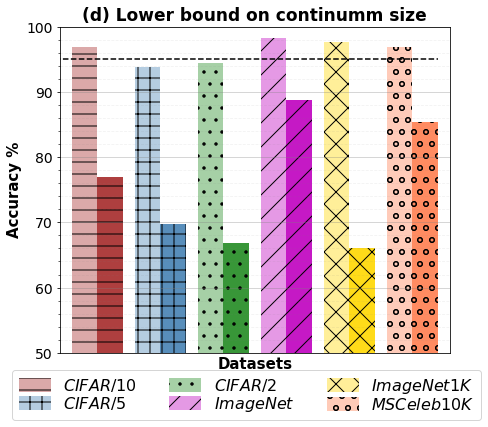

In [433]:
# "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*"
nc = 10
results = {
#                 "$\\beta=10$" : [[88.7,84.9,84.0,83.375,81.78,78.99999999999999,77.6857142857143,75.48750000000001,72.4111111111111,71.33], "brown", "o--"],
#                 "$CIFAR/20$" : [[96.75, 83.49], "m", "*--", "/"], 
                "$CIFAR/10$" : [[96.94, 76.97], "brown", "*--", "-"], #17
                "$CIFAR/5$" : [[93.84, 69.75], "steelblue", "D--", "+"], #12
                "$CIFAR/2$" : [[94.42, 66.88], "forestgreen", ">--", "."], #9
                "$ImageNet$" : [[98.28, 88.78], "m", ">--", "/"],
                "$ImageNet1K$" : [[97.70, 66.066], "gold", ">--", "x"], 
                "$MSCeleb10K$" : [[96.91, 85.31], "coral", ">--", "o"], #3
          }


plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
label = []
for i,l in enumerate(list(results.keys())):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.bar([i-0.2], results[l][0][0], width=0.4, color = results[l][1], alpha=0.4, label=l, align='center', hatch=results[l][3])
        plt.bar([i+0.2], results[l][0][1], width=0.4, color = results[l][1], alpha=0.9, align='center', hatch=results[l][3])
        label.append(l)
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()
plt.hlines(95,-0.8, 5+0.4, linestyles="--")
plt.ylim([50,100])
plt.xlim([-0.6,i+1-0.4])
plt.legend(loc='lower right',  ncol=3, handleheight=1.0, labelspacing=0.05, fontsize=16,  bbox_to_anchor=(1.1, -0.23))
# plt.bbox_to_anchor=(1.1, 1.05)
plt.xlabel("Datasets", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("(d) Lower bound on continumm size", fontweight='bold', fontsize=17)
plt.xticks(range(1,1,2), fontsize=14)
plt.yticks(fontsize=14)
# plt.xticks(list(range(i+1)), label, rotation=90, fontsize=12)

# plt.yticks(range(70,82,2))
plt.savefig("plot_data/ab_n_bar.pdf", bbox_inches='tight')


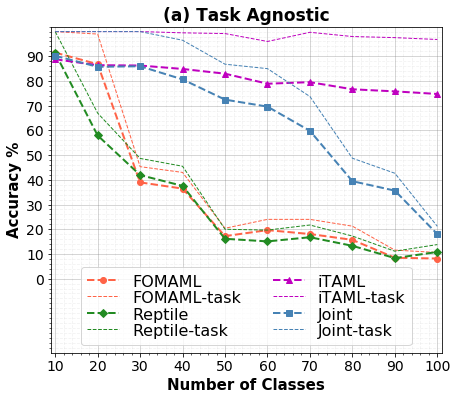

In [404]:
# CIFAR100_10
nc = 10
results = {
                "FOMAML" : [[91.5,86.8,38.96666666666667,36.449999999999996,17.22,19.650000000000002,18.071428571428573,15.7,8.466666666666667,8.15], "tomato", "o--"],
                "FOMAML-task" : [[100.0,99.0,45.33333333333333,43.0,20.4,24.0,24.0,21.25,11.555555555555555,10.6], "tomato", "--"],
    
                "Reptile" : [[91.3,57.95,41.93333333333334,37.55,16.14,15.083333333333334,16.771428571428572,13.3,8.322222222222223,10.81], "forestgreen", "D--"],
                "Reptile-task" : [[100.0,67.0,48.66666666666667,45.5,20.0,19.666666666666664,21.714285714285715,17.25,11.11111111111111,13.8], "forestgreen", "--"],
    
                "iTAML" : [[88.8,86.4,86.26666666666667,84.875,82.96,78.9,79.52857142857142,76.64999999999999,75.8,74.759], "m", "^--"],
                "iTAML-task" : [[100.0,100.0,100.0,99.5,99.2,96.0,99.71428571428571,98.0,97.55555555555556,96.8], "m", "--"],   
    
                "Joint" : [[90.2,85.75,85.96666666666667,80.65,72.46000000000001,69.63333333333334,59.82857142857143,39.45,35.63333333333333,18.04], "steelblue", "s--"],   
                "Joint-task" : [[100.0,100.0,100.0,96.5,86.8,85.0,73.71428571428571,48.75,42.66666666666667,21.2], "steelblue", "--"],   
    
          }

plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
for l in list(results.keys()):
    if("task" in l):
        plt.plot(x, results[l][0], results[l][2], linewidth=1, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([-30,102])
plt.xlim([9,101])
plt.legend(loc='lower center',  ncol=2, handleheight=1.0, labelspacing=0.05, fontsize=16)
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("(a) Task Agnostic", fontweight='bold', fontsize=17)
plt.xticks(range(nc,101,10), fontsize=14)
plt.yticks(range(0,100,10), fontsize=14)
plt.savefig("plot_data/META_ALGORITHMS.pdf", bbox_inches='tight')

In [207]:
77.08999999999999 - 71.10000000000001

5.989999999999981

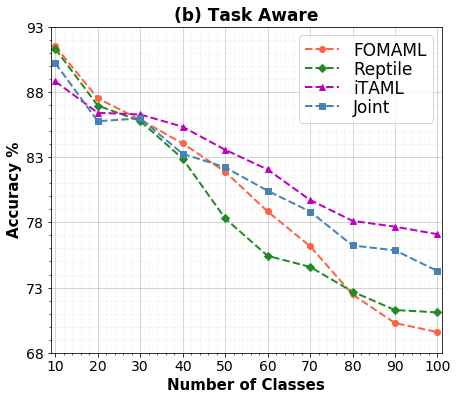

In [405]:
# CIFAR100_10
nc = 10
results = {
                "FOMAML" : [[91.5,87.5,85.86666666666667,84.05000000000001,81.88000000000001,78.83333333333333,76.17142857142858,72.475,70.27777777777777,69.59], "tomato", "o--"],
                "FOMAML-task" : [[100.0,99.0,45.33333333333333,43.0,20.4,24.0,24.0,21.25,11.555555555555555,10.6], "tomato", "--"],
    
                "Reptile" : [[91.30000000000001,86.94999999999999,85.76666666666665,82.875,78.3,75.43333333333334,74.58571428571427,72.6875,71.27777777777777,71.10000000000001], "forestgreen", "D--"],
                "Reptile-task" : [[100.0,67.0,48.66666666666667,45.5,20.0,19.666666666666664,21.714285714285715,17.25,11.11111111111111,13.8], "forestgreen", "--"],
    
                "iTAML" : [[88.8,86.4,86.26666666666665,85.325,83.56,82.05,79.71428571428571,78.1125,77.66666666666669,77.08999999999999], "m", "^--"],
                "iTAML-task" : [[100.0,100.0,100.0,99.5,99.2,96.0,99.71428571428571,98.0,97.55555555555556,96.8], "m", "--"],   
    
                "Joint" : [[90.2,85.75,85.96666666666665,83.25000000000001,82.22,80.41666666666667,78.82857142857142,76.225,75.85555555555555,74.27000000000001], "steelblue", "s--"],   
                "Joint-task" : [[100.0,100.0,100.0,96.5,86.8,85.0,73.71428571428571,48.75,42.66666666666667,21.2], "steelblue", "--"],   
    
          }

plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
for l in list(results.keys()):
    if("task" in l):
        pass
#         plt.plot(x, results[l][0], results[l][2], linewidth=1, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([68,92])
plt.xlim([9,101])
plt.legend(loc='upper right',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize=17)
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("(b) Task Aware", fontweight='bold', fontsize=17)
plt.xticks(range(nc,101,10), fontsize=14)
plt.yticks(range(68,95,5), fontsize=14)
plt.savefig("plot_data/META_ALGORITHMS_TASK_AWARE.pdf", bbox_inches='tight')

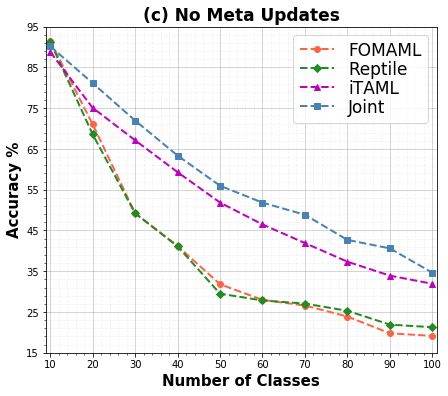

In [408]:
# CIFAR100_10
nc = 10
results = {
                "FOMAML" : [[91.5,71.05,49.266667,41.2,31.82,27.983333,26.6,23.9,19.788889,19.15], "tomato", "o--"],
                "FOMAML-task" : [[100.0,99.0,45.33333333333333,43.0,20.4,24.0,24.0,21.25,11.555555555555555,10.6], "tomato", "--"],
    
                "Reptile" : [[91.3,68.6,49.2,41.125,29.5,27.833333,27.071429,25.3,21.911111,21.28], "forestgreen", "D--"],
                "Reptile-task" : [[100.0,67.0,48.66666666666667,45.5,20.0,19.666666666666664,21.714285714285715,17.25,11.11111111111111,13.8], "forestgreen", "--"],
    
                "iTAML" : [[88.8,75.1,67.133333,59.3,51.86,46.483333,41.914286,37.35,33.922222,31.93], "m", "^--"],
                "iTAML-task" : [[100.0,100.0,100.0,99.5,99.2,96.0,99.71428571428571,98.0,97.55555555555556,96.8], "m", "--"],   
    
                "Joint" : [[90.2,81.15,71.966667,63.375,55.98,51.833333,48.857143,42.6875,40.611111,34.66], "steelblue", "s--"],   
                "Joint-task" : [[100.0,100.0,100.0,96.5,86.8,85.0,73.71428571428571,48.75,42.66666666666667,21.2], "steelblue", "--"],   
    
          }

plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
for l in list(results.keys()):
    if("task" in l):
        pass
#         plt.plot(x, results[l][0], results[l][2], linewidth=1, c = results[l][1], label=l)
    else:
        plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([15,95])
plt.xlim([9,101])
plt.legend(loc='upper right',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize=17)
plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("(c) No Meta Updates", fontweight='bold', fontsize=17)
plt.xticks(range(nc,101,10))
plt.yticks(range(15,100,10))
plt.savefig("plot_data/META_ALGORITHMS_CLASS_ACCURAY.pdf", bbox_inches='tight')

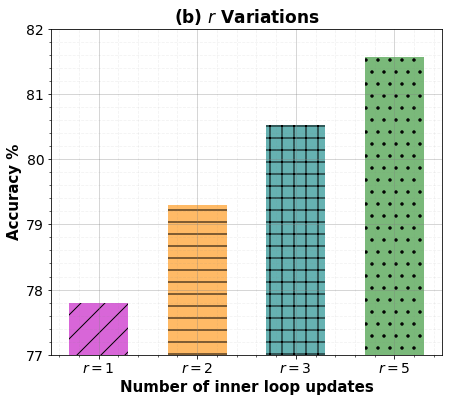

In [419]:
# CIFAR100_10
nc = 10
# "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*"
results = {
                "$r = 1$" : [[89.1,88.85,87.03333333333333,85.8,84.39999999999999,81.66666666666667,80.04285714285714,78.925,78.58888888888889,77.79], "m", "o--", "/"],
                "$r = 2$" : [[89.1,84.15,84.36666666666667,83.925,83.46000000000001,81.7,81.21428571428571,80.225,79.43333333333334,79.28999999999999], "darkorange", "D--", "-"],
                "$r = 3$" : [[90.80000000000003,86.5,86.53333333333332,85.35000000000001,83.98,82.3,81.88571428571427,80.4625,80.1,80.53], "teal", "^--", "+"],
#                 "$r = 4$" : [[90.6,87.29999999999998,87.06666666666668,85.5,84.74000000000001,83.03333333333333,82.34285714285716,81.225,80.56666666666666,80.32000000000002], "red", "s--"],   
                "$r = 5$" : [[90.6,88.55000000000001,87.83333333333333,85.625,85.03999999999999,84.05000000000001,82.44285714285714,81.0625,81.30000000000001,81.57000000000001], "forestgreen", "s--", "."],   
    
          }

# plt.figure(figsize=(7,6))
# x = range(nc,nc+100,nc)
# for l in list(results.keys())[::-1]:
#     if("task" in l):
#         pass
# #         plt.plot(x, results[l][0], results[l][2], linewidth=1, c = results[l][1], label=l)
#     else:
#         plt.plot(x, results[l][0], results[l][2], linewidth=2, c = results[l][1], label=l)
    
# plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
# plt.minorticks_on()

# plt.ylim([74,92])
# plt.xlim([9,101])
# plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, fontsize='large')
# plt.xlabel("Number of Classes", fontweight='bold', fontsize=15)
# plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
# plt.title("Variations on iTAML # of inner updates", fontweight='bold', fontsize=17)
# plt.xticks(range(nc,101,10))
# plt.yticks(range(75,92,2))
# plt.savefig("plot_data/ab_iReptile_inner_updates.pdf", bbox_inches='tight')



plt.figure(figsize=(7,6))
x = range(nc,nc+100,nc)
label = []
for i,l in enumerate(list(results.keys())):
    if(l=="Oracle"):
        y = results[l][0]
        y[1:-1] = [-1 for x in range(100//nc-2)]
        plt.plot(x, y, results[l][2], linewidth=2, c = results[l][1], label=l)
    else:
        plt.bar([i], results[l][0][-1], width=0.6, color = results[l][1], alpha=0.6, label=l, hatch=results[l][3])
        label.append(l)
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([77,82])
# plt.xlim([9,101])
# plt.legend(loc='upper right',  ncol=3, handleheight=1.0, labelspacing=0.05, fontsize='large')
plt.xlabel("Number of inner loop updates", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy %", fontweight='bold', fontsize=15)
plt.title("(b) $r$ Variations", fontweight='bold', fontsize=17)
# plt.xticks(range(nc,101,10))
plt.xticks(list(range(i+1)), label, rotation=0, fontsize=14)
plt.yticks(fontsize=14)

plt.yticks(range(77,83,1))
plt.savefig("plot_data/ab_iReptile_inner_updates_bar.pdf", bbox_inches='tight')
